In [11]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import pandas as pd

In [12]:
data = Dataset('/Users/bhaumik/Fall 2021/Data Science/Final project/MERRA2_400.tavg1_2d_slv_Nx.20210701.nc4', mode='r')

In [13]:
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

In [14]:
# Replace _FillValues with NaNs:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

In [15]:
lons[:].data

array([-1.80000000e+02, -1.79375000e+02, -1.78750000e+02, -1.78125000e+02,
       -1.77500000e+02, -1.76875000e+02, -1.76250000e+02, -1.75625000e+02,
       -1.75000000e+02, -1.74375000e+02, -1.73750000e+02, -1.73125000e+02,
       -1.72500000e+02, -1.71875000e+02, -1.71250000e+02, -1.70625000e+02,
       -1.70000000e+02, -1.69375000e+02, -1.68750000e+02, -1.68125000e+02,
       -1.67500000e+02, -1.66875000e+02, -1.66250000e+02, -1.65625000e+02,
       -1.65000000e+02, -1.64375000e+02, -1.63750000e+02, -1.63125000e+02,
       -1.62500000e+02, -1.61875000e+02, -1.61250000e+02, -1.60625000e+02,
       -1.60000000e+02, -1.59375000e+02, -1.58750000e+02, -1.58125000e+02,
       -1.57500000e+02, -1.56875000e+02, -1.56250000e+02, -1.55625000e+02,
       -1.55000000e+02, -1.54375000e+02, -1.53750000e+02, -1.53125000e+02,
       -1.52500000e+02, -1.51875000e+02, -1.51250000e+02, -1.50625000e+02,
       -1.50000000e+02, -1.49375000e+02, -1.48750000e+02, -1.48125000e+02,
       -1.47500000e+02, -

In [16]:
# Calculate wind speed:

ws = np.sqrt(U2M_nans**2+V2M_nans**2)

# Calculate wind direction in radians:

ws_direction = np.arctan2(V2M_nans,U2M_nans)

# NOTE: the MERRA-2 file contains hourly data for 24 hours (t=24). To get the daily mean wind speed, take the average of the hourly wind speeds:

ws_daily_max = np.nanmax(ws, axis=0)
ws_daily_max.data.shape

(361, 576)

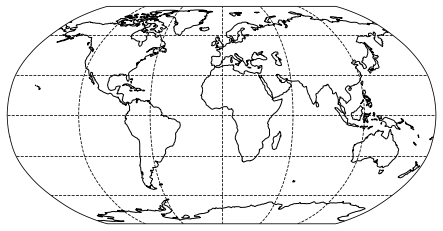

In [17]:
# Set the figure size, projection, and extent

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.crs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

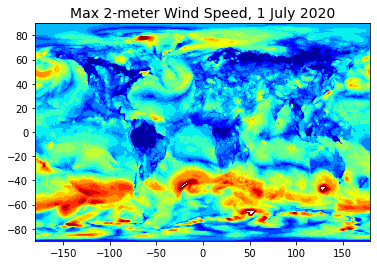

In [18]:
# Plot windspeed: set contour levels, then draw the filled contours and a colorbar

clevs = np.arange(0,19,1)
plt.contourf(lon, lat, ws_daily_max, clevs,cmap=plt.cm.jet) #, transform=ccrs.PlateCarree()

plt.title('Max 2-meter Wind Speed, 1 July 2020', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Save figure as PNG:
#fig.savefig('MERRA2_2m_ws.png', format='png', dpi=120)

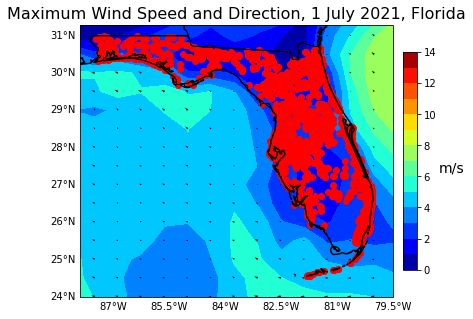

In [19]:
# The filled contours show the wind speed. The "quiver" function is used to overlay arrows to show the wind direction. The length of the arrows is determined by the wind speed.

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.crs.PlateCarree())
ax.set_extent([-87.891, -79.497, 23.994,  31.289]) #Change here to plot state borders
ax.coastlines(resolution="50m",linewidth=1)
ax.add_feature(ccrs.feature.STATES)
# Add gridlines
gl = ax.gridlines(crs=ccrs.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-85,-80])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws_daily_max.data[:,:], clevs, transform=ccrs.crs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Maximum Wind Speed and Direction, 1 July 2021, Florida', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
#Plot power grids data
powergrid_loc = pd.read_csv('/Users/bhaumik/Fall 2021/Data Science/SevereWindEffectOnCriticalInfrastructureGroup2Fall2021/data/Electric_Substations_FL.csv', names=['lon','lat'])
# long_lat = powergrid_loc.values.tolist()

plt.scatter(x=powergrid_loc['lon'], y=powergrid_loc['lat'], marker='o', c='r')
plt.show()

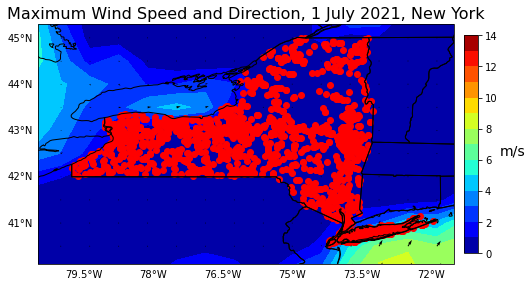

In [20]:
#For NY

# The filled contours show the wind speed. The "quiver" function is used to overlay arrows to show the wind direction. The length of the arrows is determined by the wind speed.

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.crs.PlateCarree())
ax.set_extent([-80.5, -71.497, 40.12,  45.289]) #Change here to plot state borders
ax.coastlines(resolution="50m",linewidth=1)
ax.add_feature(ccrs.feature.STATES)
# Add gridlines
gl = ax.gridlines(crs=ccrs.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-85,-80])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws_daily_max.data[:,:], clevs, transform=ccrs.crs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Maximum Wind Speed and Direction, 1 July 2021, New York', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

#Plot power grids data
powergrid_loc = pd.read_csv('/Users/bhaumik/Fall 2021/Data Science/SevereWindEffectOnCriticalInfrastructureGroup2Fall2021/data/Electric_Substations_NY.csv', usecols=['LONGITUDE','LATITUDE'])
# long_lat = powergrid_loc.values.tolist()
powergrid_loc=powergrid_loc.rename(columns={'LONGITUDE':'lon','LATITUDE':'lat'})


plt.scatter(x=powergrid_loc['lon'], y=powergrid_loc['lat'], marker='o', c='r')
plt.show()



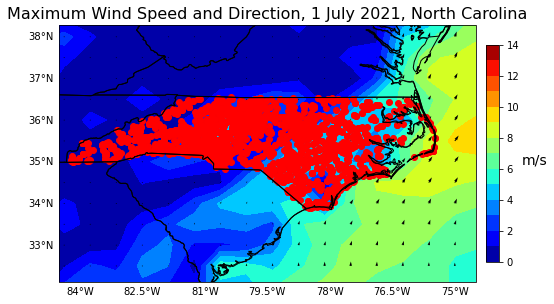

In [21]:
#For NC

# The filled contours show the wind speed. The "quiver" function is used to overlay arrows to show the wind direction. The length of the arrows is determined by the wind speed.

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.crs.PlateCarree())
ax.set_extent([-84.5, -74.497, 32.12,  38.289]) #Change here to plot state borders
ax.coastlines(resolution="50m",linewidth=1)
ax.add_feature(ccrs.feature.STATES)
# Add gridlines
gl = ax.gridlines(crs=ccrs.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-85,-80])
# gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws_daily_max.data[:,:], clevs, transform=ccrs.crs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Maximum Wind Speed and Direction, 1 July 2021, North Carolina', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

#Plot power grids data
powergrid_loc = pd.read_csv('/Users/bhaumik/Fall 2021/Data Science/SevereWindEffectOnCriticalInfrastructureGroup2Fall2021/data/Electric_Substations_NC.csv', usecols=['LONGITUDE','LATITUDE'])
# long_lat = powergrid_loc.values.tolist()
powergrid_loc=powergrid_loc.rename(columns={'LONGITUDE':'lon','LATITUDE':'lat'})


plt.scatter(x=powergrid_loc['lon'], y=powergrid_loc['lat'], marker='o', c='r')
plt.show()